## 1. Import Wholesale Customer Data

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous); 

2) MILK: annual spending (m.u.) on milk products (Continuous); 

3) GROCERY: annual spending (m.u.) on grocery products (Continuous); 

4) FROZEN: annual spending (m.u.) on frozen products (Continuous) 

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 

8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 


#### REGION Frequency:
-Lisbon 77 

-Oporto 47 

-Other Region 316 

-Total 440 



#### CHANNEL Frequency 
Horeca 298 

Retail 142 

-Total 440 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('Wholesale customers data.csv')
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [2]:
data.shape

(440, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.Channel.unique()

array([2, 1], dtype=int64)

In [5]:
data.Region.unique()

array([3, 1, 2], dtype=int64)

In [6]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [8]:
cont_data=data.loc[:,'Fresh':'Delicassen']
cont_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


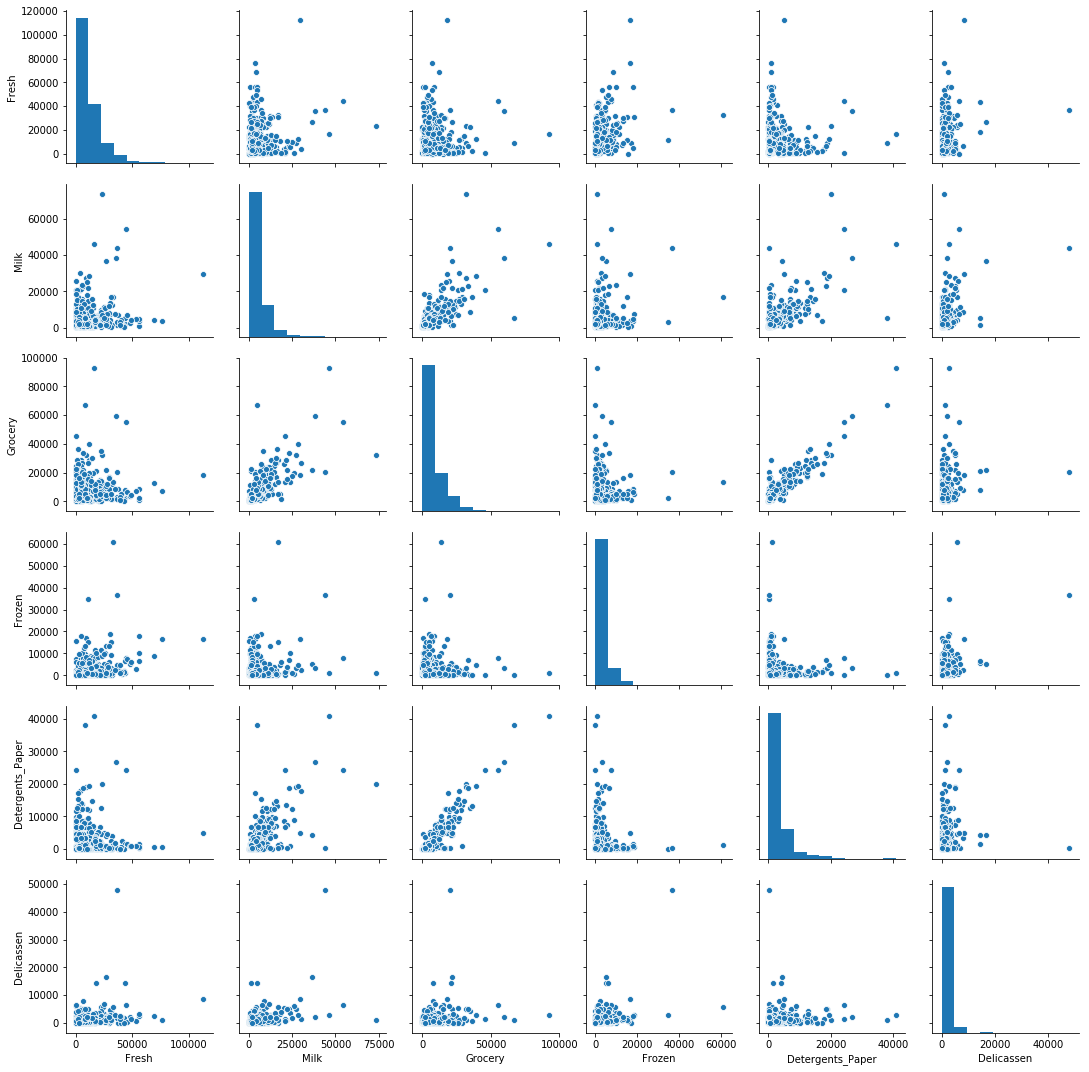

In [9]:
sns.pairplot(cont_data)

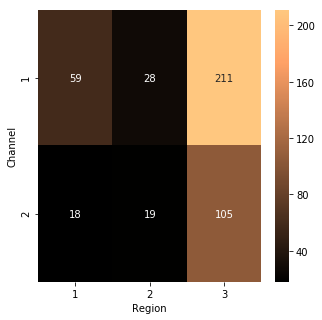

In [10]:
fig,ax=plt.subplots(figsize=(5,5))
fig=sns.heatmap(pd.crosstab(data['Channel'],data['Region']),annot=True, fmt='d',cmap='copper')

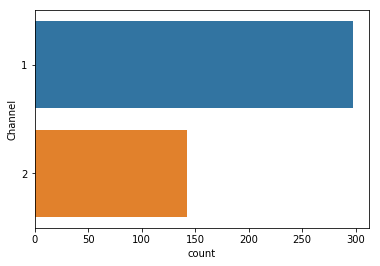

In [11]:
sns.countplot(y="Channel",data=data)

## 2. Customer Segmentation Using K-Means Clustering

### 2.1 Feature Scaling of Continuous Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(cont_data)
df_std = pd.DataFrame(df_std,columns=cont_data.columns)
df_std = pd.concat([data['Channel'],data['Region'],df_std], axis=1)
df_std.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [13]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_wss=[] 
for cluster in cluster_range:
    model = KMeans(cluster)
    model.fit(df_std.loc[:,'Fresh':'Delicassen'])
    cluster_wss.append(model.inertia_)

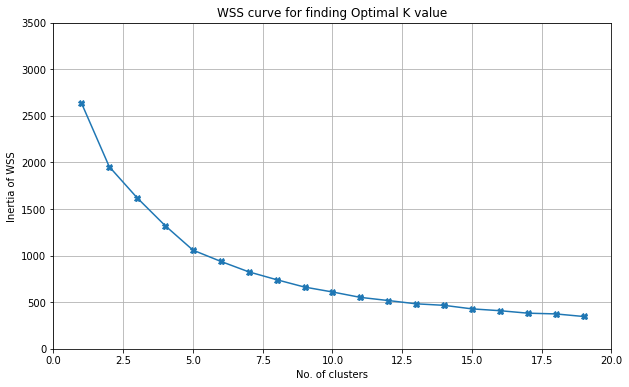

In [14]:
#PLotting Elbow curve for finding Optimal K value
plt.figure(figsize=[10,6])
plt.xlim([0, 20])
plt.ylim([0, 3500])
plt.title('WSS curve for finding Optimal K value')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia of WSS')
plt.plot(list(cluster_range),cluster_wss,marker='X')
plt.grid()
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, n_init=60, max_iter=100,n_jobs=3, random_state=0)
kmm=kmeans.fit_predict(df_std.loc[:,'Fresh':'Delicassen'])
data=df_std.loc[:,'Fresh':'Delicassen']

#clustering metric
from sklearn.metrics import silhouette_score
print("Silhoutte Score of Clusters:",silhouette_score(df_std.loc[:,'Fresh':'Delicassen'], kmm))

Silhoutte Score of Clusters: 0.36807191214496154


In [16]:
#cluster dataframe
kmm=pd.DataFrame(kmm)
kmm.columns=['customer_cluster']

In [17]:
#concatenation of cluster number column with standardised dataframe
datum=pd.concat([df_std,kmm],axis=1)
datum= pd.get_dummies(datum,columns=['customer_cluster','Region'])
datum.head(10)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,customer_cluster_0,customer_cluster_1,customer_cluster_2,customer_cluster_3,customer_cluster_4,Region_1,Region_2,Region_3
0,2,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,1,0,0,0,0,0,1
1,2,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,0,0,0,0,0,0,1
2,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,0,0,0,0,0,0,1
3,1,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,1,0,0,0,0,0,1
4,2,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,0,0,0,1,0,0,1
5,2,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0,1,0,0,0,0,0,1
6,2,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,0,1,0,0,0,0,0,1
7,2,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601,0,1,0,0,0,0,0,1
8,1,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,0,1,0,0,0,0,0,1
9,2,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461,1,0,0,0,0,0,0,1


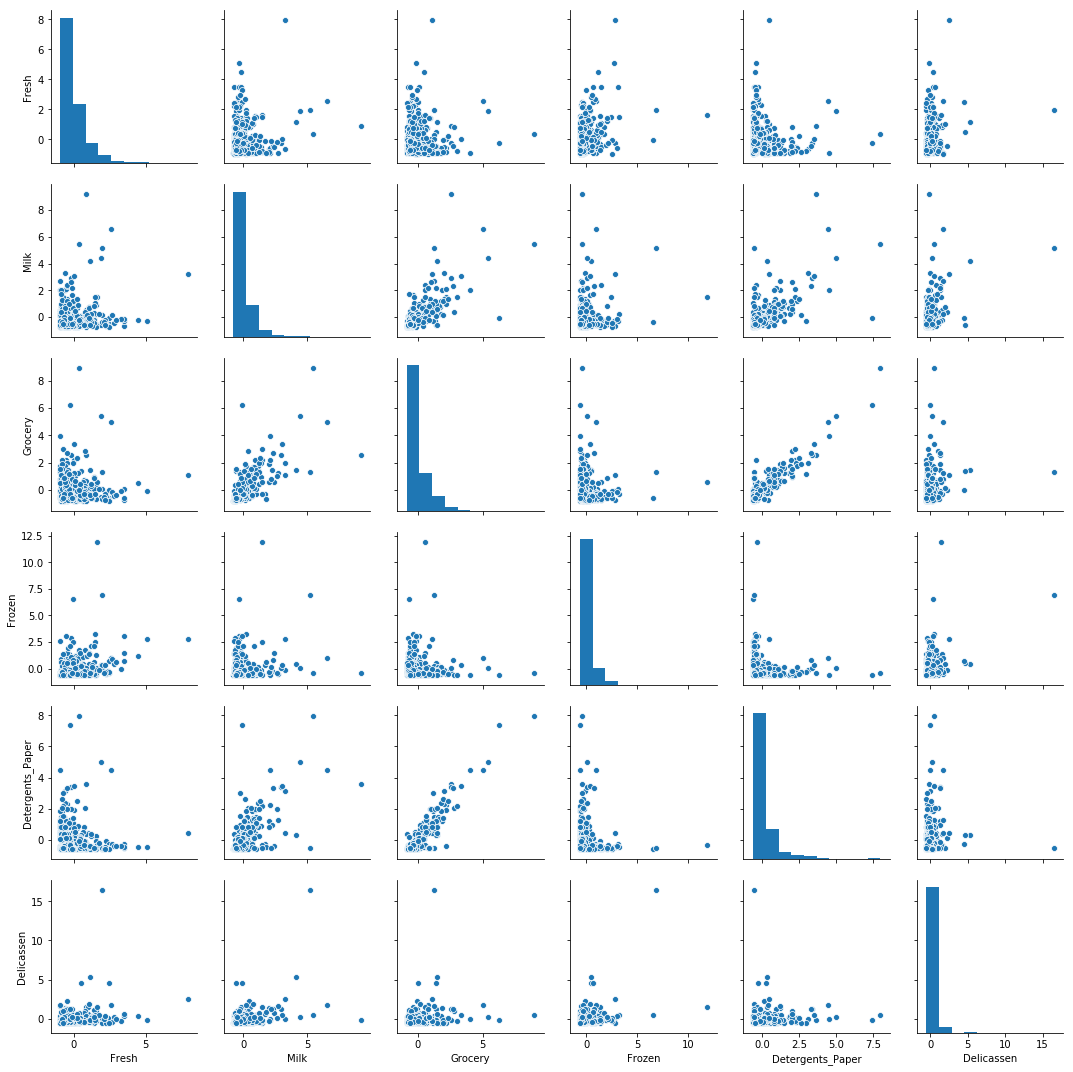

In [18]:
sns.pairplot(df_std.loc[:,'Fresh':'Delicassen'])

In [19]:
# Clean up dataframe and select target
target = 'Channel'
features = datum.columns != target

x = datum.loc[:, features]
y = datum[target]

## 3. Predictive Modelling

### 3.1 Predictions Using Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(330, 14) (110, 14) (330,) (110,)


In [21]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(C=1.5,solver='liblinear')
lg.fit(x_train,y_train)


LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
from sklearn.model_selection import cross_validate,  StratifiedKFold
cv = StratifiedKFold(8, shuffle=True)
scores_lg = cross_validate(lg, x_train, y_train, cv=cv, return_train_score=True,return_estimator=False)
scores_lg =pd.DataFrame(scores_lg)
scores_lg

,fit_time,score_time,test_score,train_score
0,0.003995,0.003994,0.928571,0.909722
1,0.003993,0.004014,0.952381,0.920139
2,0.008217,0.000000,0.904762,0.906250
3,0.000000,0.000000,0.902439,0.920415
4,0.015622,0.000000,0.780488,0.930796
5,0.000000,0.000000,0.902439,0.910035
6,0.015624,0.000000,0.902439,0.923875
7,0.000000,0.000000,0.950000,0.906897


In [23]:
print('Mean Test Score of Logistic Regression: ', scores_lg ['test_score'].mean())
print('Mean Train Score of Logistic Regression: ', scores_lg ['train_score'].mean())

Mean Test Score of Logistic Regression:  0.9029398954703833
Mean Train Score of Logistic Regression:  0.9160160962627106


In [24]:
y_pred_lg = lg.predict(x_test)
y_pred_lg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2],
      dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'lg_Prediction')]

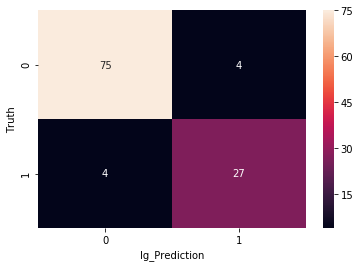

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, f1_score

ax = sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True, fmt='d')
ax.set(xlabel='lg_Prediction', ylabel='Truth')

In [26]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        79
           2       0.87      0.87      0.87        31

    accuracy                           0.93       110
   macro avg       0.91      0.91      0.91       110
weighted avg       0.93      0.93      0.93       110



In [27]:
print('Accuracy Score of Logistic Regression:', accuracy_score(y_pred_lg, y_test))
print('Average Precision-Recall Score of Logistic Regression:',average_precision_score(y_pred_lg, y_test))

Accuracy Score of Logistic Regression: 0.9272727272727272
Average Precision-Recall Score of Logistic Regression: 0.6883514607075244


In [28]:
def precision_recall_curve (model, model_name, pos_label):
    
    from sklearn.metrics import precision_recall_curve, auc
    y_pred_proba = model.predict_proba(x_test)[::,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label=pos_label)
    # calculate precision-recall AUC
    auc = auc(recall, precision)
    
    plt.figure()
    plt.plot(recall, precision, color='darkred', lw=1, label='precision-recall AUC (area = %0.2f)' % auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve of {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.grid(linestyle=':', linewidth=2)
    return plt.show()

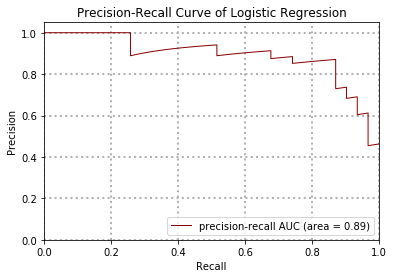

In [29]:
precision_recall_curve (lg, 'Logistic Regression', 2)

In [30]:
def plot_coefficients(model, kind, color, title, dataframe):
    num=len(dataframe.columns)
    importances = pd.DataFrame(data=model.coef_.reshape(num,1), index= dataframe.columns)
    # Draw a horizontal barplot of importances_sorted
    importances.plot(kind=kind, color=color)
    plt.title(title)
    return (plt.show())

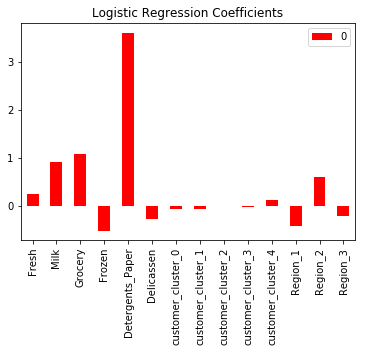

In [31]:
plot_coefficients(lg, 'bar', 'red', 'Logistic Regression Coefficients', x_train)

### 3.2 Gaussian Process Classifier 

In [32]:
from sklearn.gaussian_process import GaussianProcessClassifier
rg=GaussianProcessClassifier()
rg.fit(x_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [33]:
scores_rg = cross_validate(rg, x_train, y_train, cv=cv, return_train_score=True,return_estimator=False)
scores_rg =pd.DataFrame(scores_rg)
scores_rg

,fit_time,score_time,test_score,train_score
0,0.034030,0.015622,0.904762,0.927083
1,0.015622,0.000000,0.904762,0.944444
2,0.015622,0.000000,0.880952,0.923611
3,0.015620,0.000000,0.975610,0.927336
4,0.015635,0.000000,0.926829,0.923875
5,0.031243,0.000000,0.926829,0.934256
6,0.015624,0.000000,0.902439,0.934256
7,0.015622,0.015620,0.850000,0.934483


In [34]:
print('Mean Test Score of GaussianProcess Classifier: ', scores_rg ['test_score'].mean())
print('Mean Train Score of GaussianProcess Classifier: ', scores_rg ['train_score'].mean())

Mean Test Score of GaussianProcess Classifier:  0.9090229384436702
Mean Train Score of GaussianProcess Classifier:  0.9311681038625728


In [35]:
y_pred_rg = rg.predict(x_test)
y_pred_rg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

[Text(33.0, 0.5, 'Truth'),
 Text(0.5, 15.0, 'Gaussian Process Classifier_Prediction')]

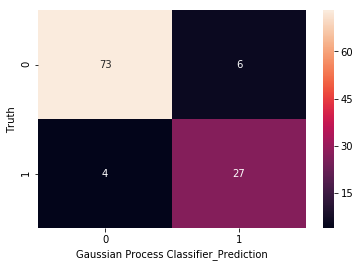

In [36]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rg), annot=True, fmt='d')
ax.set(xlabel='Gaussian Process Classifier_Prediction', ylabel='Truth')

In [37]:
print(classification_report(y_test, y_pred_rg))

              precision    recall  f1-score   support

           1       0.95      0.92      0.94        79
           2       0.82      0.87      0.84        31

    accuracy                           0.91       110
   macro avg       0.88      0.90      0.89       110
weighted avg       0.91      0.91      0.91       110



In [38]:
print('Accuracy Score of Gaussian Process Classifier:', accuracy_score(y_pred_rg, y_test))
print('Average Precision-Recall Score of Gaussian Process Classifier:',average_precision_score(y_pred_rg, y_test))

Accuracy Score of Gaussian Process Classifier: 0.9090909090909091
Average Precision-Recall Score of Gaussian Process Classifier: 0.6703393380812736


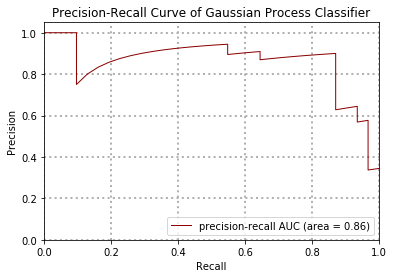

In [39]:
precision_recall_curve (rg, 'Gaussian Process Classifier', 2)

### 3.3 Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=3, max_features=4,random_state=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [41]:
scores_dt= cross_validate(dt, x_train, y_train, cv=cv, return_train_score=True,return_estimator=False)
scores_dt =pd.DataFrame(scores_dt)
scores_dt

,fit_time,score_time,test_score,train_score
0,0.002726,0.000000,0.904762,0.947917
1,0.009116,0.000000,0.904762,0.947917
2,0.003994,0.000000,0.976190,0.940972
3,0.003996,0.000000,0.829268,0.955017
4,0.004004,0.000000,0.975610,0.941176
5,0.000000,0.003995,0.951220,0.937716
6,0.001935,0.000000,0.902439,0.948097
7,0.000000,0.000000,0.950000,0.941379


In [42]:
print('Mean Test Score of Decision Tree Classifier: ', scores_dt ['test_score'].mean())
print('Mean Train Score of Decision Tree Classifier: ', scores_dt ['train_score'].mean())

Mean Test Score of Decision Tree Classifier:  0.9242813588850174
Mean Train Score of Decision Tree Classifier:  0.945023973289451


In [43]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2],
      dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Decision Tree_Prediction')]

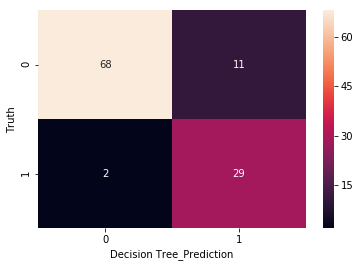

In [44]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
ax.set(xlabel='Decision Tree_Prediction', ylabel='Truth')

In [45]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       0.97      0.86      0.91        79
           2       0.72      0.94      0.82        31

    accuracy                           0.88       110
   macro avg       0.85      0.90      0.86       110
weighted avg       0.90      0.88      0.89       110



In [46]:
print('Accuracy Score of Decision Tree Classifier:', accuracy_score(y_pred_dt, y_test))
print('Average Precision-Recall Score of Decision Tree Classifier:',average_precision_score(y_pred_dt, y_test))

Accuracy Score of Decision Tree Classifier: 0.8818181818181818
Average Precision-Recall Score of Decision Tree Classifier: 0.6200251361541684


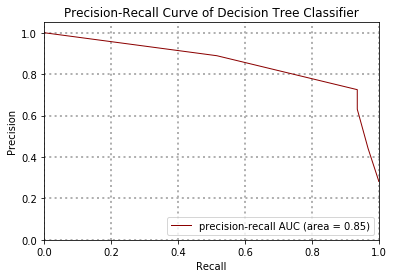

In [47]:
precision_recall_curve (dt, 'Decision Tree Classifier', 2)

In [48]:
# saving tree structure view in pdf format
# Requires graphviz to be installed with class setup instructions

from sklearn.tree import export_graphviz
import graphviz

filename = 'dtc_wholesale.dot'
export_graphviz(dt,
                out_file=filename,
                filled=True,
                rounded=True)

source = graphviz.Source.from_file(filename)
source.render(view=True)

'dtc_wholesale.dot.pdf'

In [49]:
def plot_feature_importances (model, kind, title, color, dataframe):
    importances = pd.Series(data=model.feature_importances_, index= dataframe.columns)
    # Sort importances
    importances_sorted = importances.sort_values()
    # Draw a horizontal barplot of importances_sorted
    importances_sorted.plot(kind=kind, color=color)
    plt.title(title)
    return(plt.show())

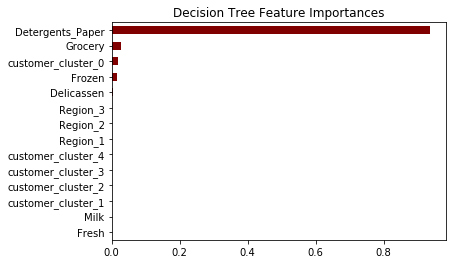

In [50]:
plot_feature_importances (dt, 'barh', 'Decision Tree Feature Importances', 'maroon', x_train)

### 3.4 Predictions Using XGB Classifier

In [51]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=120, learning_rate=0.012, max_depth=5, seed=100,reg_lambda=2)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=120, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=2, scale_pos_weight=1, seed=100, silent=True,
              subsample=1)

In [52]:
# cross validate XGBoost Classifier

scores_xgb = cross_validate(xgb, x_train, y_train, cv=cv, return_train_score=True,return_estimator=False)
scores_xgb =pd.DataFrame(scores_xgb)
scores_xgb

,fit_time,score_time,test_score,train_score
0,0.085577,0.000000,0.976190,0.954861
1,0.078108,0.000000,0.880952,0.968750
2,0.046896,0.015621,0.928571,0.954861
3,0.046830,0.000000,0.951220,0.958478
4,0.046862,0.000000,0.975610,0.955017
5,0.062448,0.000000,0.829268,0.972318
6,0.062546,0.000000,0.926829,0.968858
7,0.062424,0.000000,0.900000,0.962069


In [53]:
print('Mean Test Score of XGBoost Classifier: ', scores_xgb ['test_score'].mean())
print('Mean Train Score of XGBoost Classifier: ', scores_xgb ['train_score'].mean())

Mean Test Score of XGBoost Classifier:  0.9210801393728223
Mean Train Score of XGBoost Classifier:  0.9619015585020351


In [54]:
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2],
      dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'XGB_Prediction')]

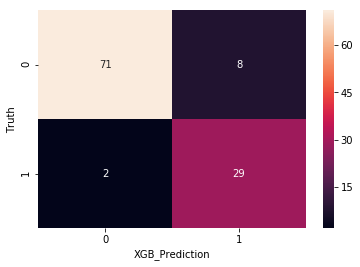

In [55]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
ax.set(xlabel='XGB_Prediction', ylabel='Truth')

In [56]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           1       0.97      0.90      0.93        79
           2       0.78      0.94      0.85        31

    accuracy                           0.91       110
   macro avg       0.88      0.92      0.89       110
weighted avg       0.92      0.91      0.91       110



In [57]:
print('Accuracy Score of XGB Classifier:', accuracy_score(y_pred_xgb, y_test))
print('Average Precision-Recall Score of XGB Classifier:',average_precision_score(y_pred_xgb, y_test))

Accuracy Score of XGB Classifier: 0.9090909090909091
Average Precision-Recall Score of XGB Classifier: 0.6472221106335114


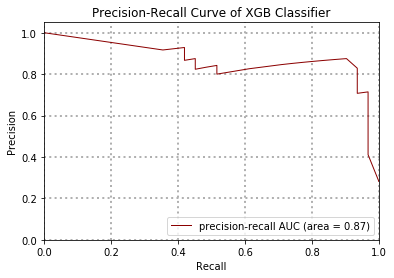

In [58]:
precision_recall_curve (xgb, 'XGB Classifier', 2)

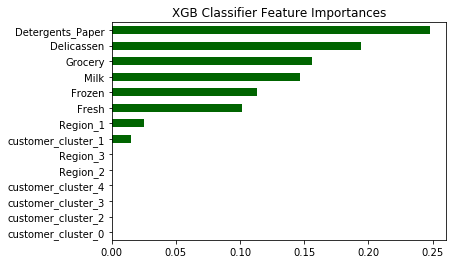

In [59]:
plot_feature_importances (xgb, 'barh', 'XGB Classifier Feature Importances', 'darkgreen', x_train)

### 3.5 Predictions Using KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

weights='distance'
algorithm='auto'
n_neighbors=3

clf = KNeighborsClassifier(weights=weights,algorithm=algorithm,n_neighbors=n_neighbors, p=1)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [61]:
# cross validate KNN Classifier
scores_clf = cross_validate(clf, x_train, y_train, cv=cv, return_train_score=True,return_estimator=False)
scores_clf = pd.DataFrame(scores_clf)
scores_clf

,fit_time,score_time,test_score,train_score
0,0.007986,0.00000,0.928571,1.0
1,0.004005,0.00157,0.928571,1.0
2,0.000000,0.00000,0.833333,1.0
3,0.015621,0.00000,0.975610,1.0
4,0.015620,0.00000,0.878049,1.0
5,0.000000,0.00000,0.951220,1.0
6,0.015624,0.00000,0.878049,1.0
7,0.000000,0.00000,0.850000,1.0


In [62]:
print('Mean Test Score of KNN Classifier: ', scores_clf ['test_score'].mean())
print('Mean Train Score of KNN Classifier: ', scores_clf ['train_score'].mean())

Mean Test Score of KNN Classifier:  0.9029253774680603
Mean Train Score of KNN Classifier:  1.0


In [63]:
y_pred_clf = clf.predict(x_test)
y_pred_clf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2],
      dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'KNN_Prediction')]

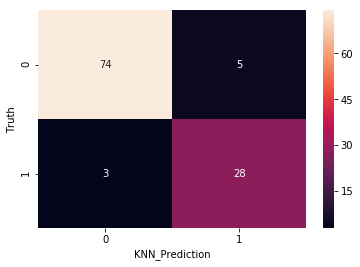

In [64]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d')
ax.set(xlabel='KNN_Prediction', ylabel='Truth')

In [65]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95        79
           2       0.85      0.90      0.88        31

    accuracy                           0.93       110
   macro avg       0.90      0.92      0.91       110
weighted avg       0.93      0.93      0.93       110



In [66]:
print('Accuracy Score of KNN Classifier:', accuracy_score(y_pred_xgb, y_test))
print('Average Precision-Recall Score of KNN Classifier:',average_precision_score(y_pred_xgb, y_test))

Accuracy Score of KNN Classifier: 0.9090909090909091
Average Precision-Recall Score of KNN Classifier: 0.6472221106335114


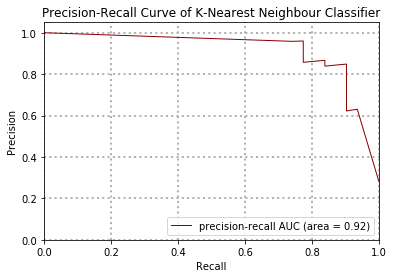

In [67]:
precision_recall_curve (clf, 'K-Nearest Neighbour Classifier', 2)

### 3.6 Predictions Using SVM Classifier

In [68]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=0.8, class_weight='balanced',probability=True)
svc.fit(x_train, y_train)

SVC(C=0.8, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
from sklearn.model_selection import cross_validate

# cross validate SVM Classifier
scores_svc = cross_validate(svc, x_train, y_train, cv=cv, return_train_score=True,return_estimator=False)
scores_svc = pd.DataFrame(scores_svc)
scores_svc

,fit_time,score_time,test_score,train_score
0,0.003608,0.000000,0.904762,0.923611
1,0.017539,0.003990,0.976190,0.913194
2,0.014578,0.000000,0.880952,0.923611
3,0.015622,0.000000,0.902439,0.927336
4,0.015620,0.000000,0.902439,0.923875
5,0.000000,0.015622,0.878049,0.930796
6,0.000000,0.000000,0.902439,0.930796
7,0.015622,0.000000,0.950000,0.917241


In [70]:
print('Mean Test Score of SVC Classifier: ', scores_svc ['test_score'].mean())
print('Mean Train Score of SVC Classifier: ', scores_svc ['train_score'].mean())

Mean Test Score of SVC Classifier:  0.9121588269454123
Mean Train Score of SVC Classifier:  0.9238076017678878


In [71]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2],
      dtype=int64)

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'SVM_Prediction')]

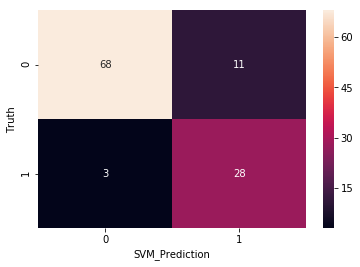

In [72]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')
ax.set(xlabel='SVM_Prediction', ylabel='Truth')

In [73]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.96      0.86      0.91        79
           2       0.72      0.90      0.80        31

    accuracy                           0.87       110
   macro avg       0.84      0.88      0.85       110
weighted avg       0.89      0.87      0.88       110



In [74]:
print('Accuracy Score of SVM Classifier:', accuracy_score(y_pred_svc, y_test))
print('Average Precision-Recall Score of SVM Classifier:',average_precision_score(y_pred_svc, y_test))

Accuracy Score of SVM Classifier: 0.8727272727272727
Average Precision-Recall Score of SVM Classifier: 0.6222708686134403


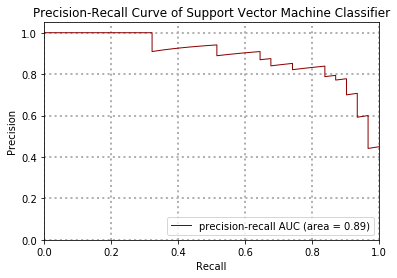

In [75]:
precision_recall_curve (svc, 'Support Vector Machine Classifier', 2)

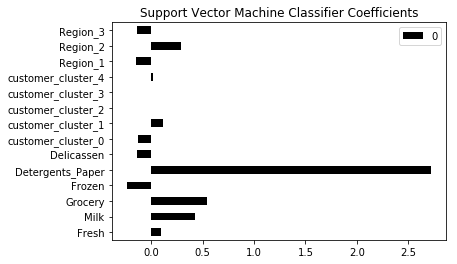

In [76]:
plot_coefficients(svc, 'barh', 'black', 'Support Vector Machine Classifier Coefficients', x_train)

## 4. Comparing Learning Curves Of Different Models 

In [77]:
def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    from sklearn.model_selection import learning_curve
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    #Learning curve definition
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    # commands for plotting
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="green")
    plt.plot(train_sizes, train_scores_mean, '^-', color="red",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '^-', color="green",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

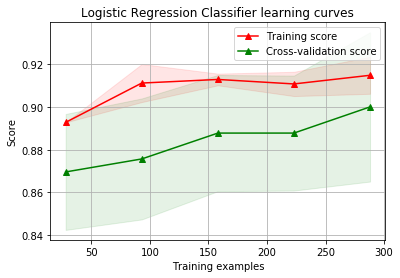

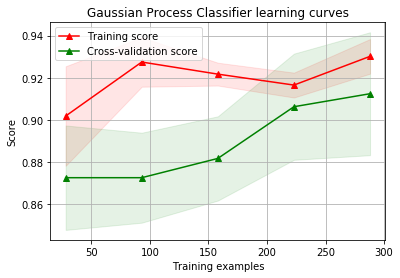

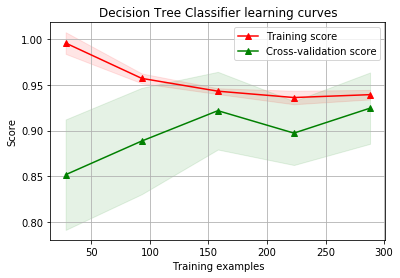

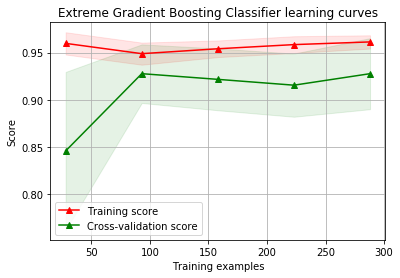

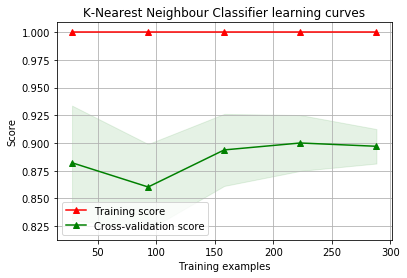

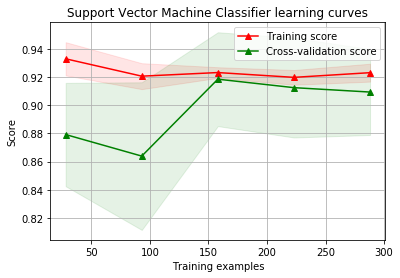

In [78]:
g = plot_learning_curve(lg,"Logistic Regression Classifier learning curves",x_train,y_train,cv=8)
g = plot_learning_curve(rg,"Gaussian Process Classifier learning curves",x_train,y_train,cv=8)
g = plot_learning_curve(dt,"Decision Tree Classifier learning curves",x_train,y_train,cv=8)
g = plot_learning_curve(xgb,"Extreme Gradient Boosting Classifier learning curves",x_train,y_train,cv=8)
g = plot_learning_curve(clf,"K-Nearest Neighbour Classifier learning curves",x_train,y_train,cv=8)
g = plot_learning_curve(svc,"Support Vector Machine Classifier learning curves",x_train,y_train,cv=8)

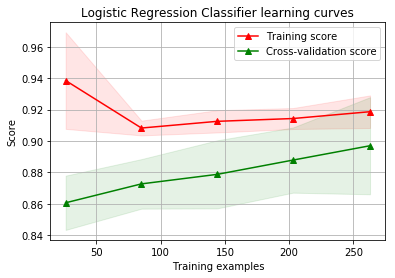

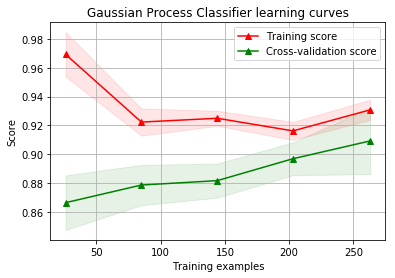

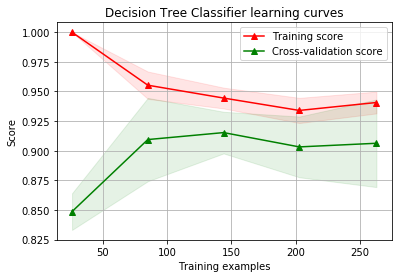

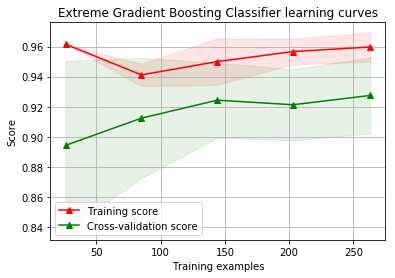

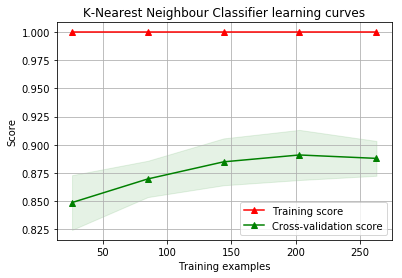

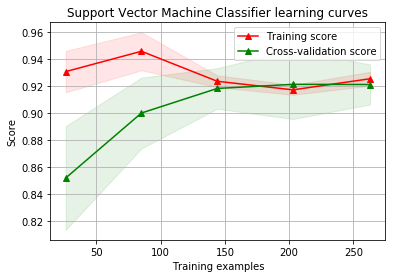

In [79]:
f = plot_learning_curve(lg,"Logistic Regression Classifier learning curves",x_train,y_train,cv=5)
f = plot_learning_curve(rg,"Gaussian Process Classifier learning curves",x_train,y_train,cv=5)
f = plot_learning_curve(dt,"Decision Tree Classifier learning curves",x_train,y_train,cv=5)
f = plot_learning_curve(xgb,"Extreme Gradient Boosting Classifier learning curves",x_train,y_train,cv=5)
f = plot_learning_curve(clf,"K-Nearest Neighbour Classifier learning curves",x_train,y_train,cv=5)
f = plot_learning_curve(svc,"Support Vector Machine Classifier learning curves",x_train,y_train,cv=5)